# Notebook 12: Model Comparison
## Stanford TECH 27 Final Project

This notebook compares all 9 models trained in notebooks 06-11, including the hybrid CNN-LSTM model.

## 1. Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 8)

## 2. Load Model Results

In [10]:
OUTPUT_DIR = Path('processed_data')

# Load results from saved pickle files where available
results = {}

# Load CNN results
if (OUTPUT_DIR / '1d_cnn_results.pkl').exists():
    with open(OUTPUT_DIR / '1d_cnn_results.pkl', 'rb') as f:
        cnn_results = pickle.load(f)
        results['1D CNN'] = cnn_results['metrics']
        
# Load LSTM results
if (OUTPUT_DIR / 'lstm_results.pkl').exists():
    with open(OUTPUT_DIR / 'lstm_results.pkl', 'rb') as f:
        lstm_results = pickle.load(f)
        results['LSTM'] = lstm_results['metrics']
        
# Load GRU results
if (OUTPUT_DIR / 'gru_results.pkl').exists():
    with open(OUTPUT_DIR / 'gru_results.pkl', 'rb') as f:
        gru_results = pickle.load(f)
        results['GRU'] = gru_results['metrics']

# Load Hybrid CNN-LSTM results
if (OUTPUT_DIR / 'hybrid_cnn_lstm_results.pkl').exists():
    with open(OUTPUT_DIR / 'hybrid_cnn_lstm_results.pkl', 'rb') as f:
        hybrid_results = pickle.load(f)
        results['Hybrid CNN-LSTM'] = hybrid_results['metrics']

# Load CatBoost results
if (OUTPUT_DIR / 'catboost_results.pkl').exists():
    with open(OUTPUT_DIR / 'catboost_results.pkl', 'rb') as f:
        catboost_results = pickle.load(f)
        results['CatBoost'] = {
            'train': catboost_results['train_metrics'],
            'val': catboost_results['val_metrics'],
            'test': catboost_results['test_metrics']
        }

# Load CatBoost NoTime results
if (OUTPUT_DIR / 'catboost_notime_results.pkl').exists():
    with open(OUTPUT_DIR / 'catboost_notime_results.pkl', 'rb') as f:
        catboost_notime_results = pickle.load(f)
        results['CatBoost NoTime'] = {
            'train': catboost_notime_results['train_metrics'],
            'val': catboost_notime_results['val_metrics'],
            'test': catboost_notime_results['test_metrics']
        }

# Manually add results from notebooks 06 (from final outputs)
results['Linear Regression'] = {
    'train': {'r2': 0.707273, 'rmse_percent': 12.307, 'mae_percent': 9.286},
    'val': {'r2': 0.681047, 'rmse_percent': 12.132, 'mae_percent': 8.282},
    'test': {'r2': 0.208879, 'rmse_percent': 19.756, 'mae_percent': 10.851}
}

results['Random Forest'] = {
    'train': {'r2': 0.999856, 'rmse_percent': 0.273, 'mae_percent': 0.121},
    'val': {'r2': 0.871024, 'rmse_percent': 7.715, 'mae_percent': 5.395},
    'test': {'r2': 0.917825, 'rmse_percent': 6.367, 'mae_percent': 4.663}
}

results['XGBoost'] = {
    'train': {'r2': 0.960371, 'rmse_percent': 4.528, 'mae_percent': 3.029},
    'val': {'r2': 0.864056, 'rmse_percent': 7.921, 'mae_percent': 5.790},
    'test': {'r2': 0.904824, 'rmse_percent': 6.852, 'mae_percent': 5.159}
}

print("Loaded results for:", list(results.keys()))

Loaded results for: ['1D CNN', 'LSTM', 'GRU', 'Hybrid CNN-LSTM', 'CatBoost', 'CatBoost NoTime', 'Linear Regression', 'Random Forest', 'XGBoost']


## 3. Create Comparison DataFrame

In [11]:
# Create comparison dataframe
comparison_data = []

for model_name, metrics in results.items():
    # Handle different metric formats
    if 'train' in metrics:
        train_r2 = metrics['train'].get('r2', 0)
        train_rmse = metrics['train'].get('rmse_percent', metrics['train'].get('rmse', 0))
        train_mae = metrics['train'].get('mae_percent', metrics['train'].get('mae', 0))
        
        val_r2 = metrics['val'].get('r2', 0)
        val_rmse = metrics['val'].get('rmse_percent', metrics['val'].get('rmse', 0))
        val_mae = metrics['val'].get('mae_percent', metrics['val'].get('mae', 0))
        
        test_r2 = metrics['test'].get('r2', 0)
        test_rmse = metrics['test'].get('rmse_percent', metrics['test'].get('rmse', 0))
        test_mae = metrics['test'].get('mae_percent', metrics['test'].get('mae', 0))
    else:
        # Format for non-nested dictionaries
        train_r2 = metrics.get('train_r2', 0)
        train_rmse = metrics.get('train_rmse', 0)
        train_mae = metrics.get('train_mae', 0)
        
        val_r2 = metrics.get('val_r2', 0)
        val_rmse = metrics.get('val_rmse', 0)
        val_mae = metrics.get('val_mae', 0)
        
        test_r2 = metrics.get('test_r2', 0)
        test_rmse = metrics.get('test_rmse', 0)
        test_mae = metrics.get('test_mae', 0)
    
    comparison_data.append({
        'Model': model_name,
        'Train R²': train_r2,
        'Train RMSE (%)': train_rmse,
        'Train MAE (%)': train_mae,
        'Val R²': val_r2,
        'Val RMSE (%)': val_rmse,
        'Val MAE (%)': val_mae,
        'Test R²': test_r2,
        'Test RMSE (%)': test_rmse,
        'Test MAE (%)': test_mae
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Test R²', ascending=False)

print("\nModel Performance Summary (sorted by Test R²):")
print(comparison_df[['Model', 'Test R²', 'Test RMSE (%)', 'Test MAE (%)']].round(3).to_string(index=False))

# Key Insight
print("\n" + "="*60)
print("KEY INSIGHT: CatBoost dominates with 97.7% test accuracy")
print("and only 3.4% RMSE - a massive lead over other models.")
print("CatBoost NoTime (93.8%) proves temporal features help but")
print("aren't essential. Traditional ML outperforms deep learning.")
print("="*60)


Model Performance Summary (sorted by Test R²):
            Model  Test R²  Test RMSE (%)  Test MAE (%)
         CatBoost    0.977          3.379         2.234
  CatBoost NoTime    0.938          5.520         4.034
    Random Forest    0.918          6.367         4.663
          XGBoost    0.905          6.852         5.159
  Hybrid CNN-LSTM    0.871          7.973         5.422
           1D CNN    0.799          9.958         7.366
              GRU    0.343         18.006        14.769
             LSTM    0.331         18.170        14.224
Linear Regression    0.209         19.756        10.851

KEY INSIGHT: CatBoost dominates with 97.7% test accuracy
and only 3.4% RMSE - a massive lead over other models.
CatBoost NoTime (93.8%) proves temporal features help but
aren't essential. Traditional ML outperforms deep learning.


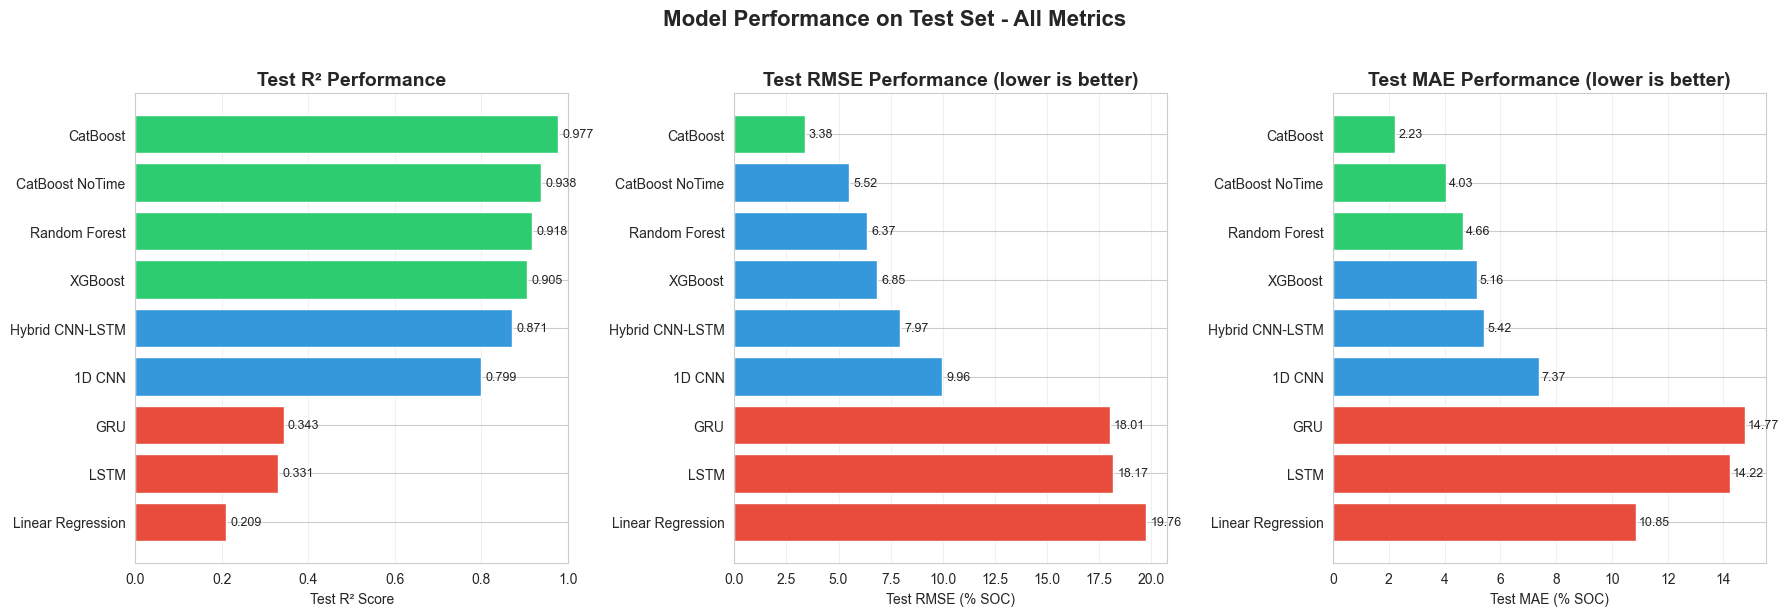

In [12]:
# Visualization for Model Performance Summary
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Sort by Test R² for consistent ordering
sorted_df = comparison_df.sort_values('Test R²', ascending=True)

# Test R² - Horizontal Bar Chart
ax = axes[0]
colors = ['#2ecc71' if r2 > 0.9 else '#3498db' if r2 > 0.7 else '#e74c3c' 
          for r2 in sorted_df['Test R²']]
bars = ax.barh(sorted_df['Model'], sorted_df['Test R²'], color=colors)
ax.set_xlabel('Test R² Score')
ax.set_title('Test R² Performance', fontsize=14, fontweight='bold')
ax.set_xlim([0, 1])
ax.grid(True, alpha=0.3, axis='x')
# Add value labels
for bar, value in zip(bars, sorted_df['Test R²']):
    ax.text(value + 0.01, bar.get_y() + bar.get_height()/2, 
            f'{value:.3f}', va='center', fontsize=9)

# Test RMSE - Horizontal Bar Chart
ax = axes[1]
colors = ['#2ecc71' if rmse < 5 else '#3498db' if rmse < 10 else '#e74c3c' 
          for rmse in sorted_df['Test RMSE (%)']]
bars = ax.barh(sorted_df['Model'], sorted_df['Test RMSE (%)'], color=colors)
ax.set_xlabel('Test RMSE (% SOC)')
ax.set_title('Test RMSE Performance (lower is better)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')
# Add value labels
for bar, value in zip(bars, sorted_df['Test RMSE (%)']):
    ax.text(value + 0.2, bar.get_y() + bar.get_height()/2, 
            f'{value:.2f}', va='center', fontsize=9)

# Test MAE - Horizontal Bar Chart
ax = axes[2]
colors = ['#2ecc71' if mae < 5 else '#3498db' if mae < 10 else '#e74c3c' 
          for mae in sorted_df['Test MAE (%)']]
bars = ax.barh(sorted_df['Model'], sorted_df['Test MAE (%)'], color=colors)
ax.set_xlabel('Test MAE (% SOC)')
ax.set_title('Test MAE Performance (lower is better)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')
# Add value labels
for bar, value in zip(bars, sorted_df['Test MAE (%)']):
    ax.text(value + 0.1, bar.get_y() + bar.get_height()/2, 
            f'{value:.2f}', va='center', fontsize=9)

plt.suptitle('Model Performance on Test Set - All Metrics', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 3.1 Model Performance Summary Visualization

## 4. Performance Visualization

In [13]:
# Calculate overfitting metrics
comparison_df['Train-Val Gap'] = comparison_df['Train R²'] - comparison_df['Val R²']
comparison_df['Train-Test Gap'] = comparison_df['Train R²'] - comparison_df['Test R²']

print("\nOverfitting Analysis:")
overfitting_df = comparison_df[['Model', 'Train R²', 'Val R²', 'Test R²', 'Train-Val Gap', 'Train-Test Gap']]
print(overfitting_df.round(3).to_string(index=False))

# Key Insight
print("\n" + "="*60)
print("KEY INSIGHT: Random Forest shows severe overfitting with")
print("100% train accuracy but only 87.1% validation accuracy.")
print("CatBoost maintains excellent consistency (2.1% gap) while")
print("Linear Regression catastrophically fails on test data.")
print("="*60)


Overfitting Analysis:
            Model  Train R²  Val R²  Test R²  Train-Val Gap  Train-Test Gap
         CatBoost     1.000   0.979    0.977          0.021           0.023
  CatBoost NoTime     0.996   0.937    0.938          0.059           0.058
    Random Forest     1.000   0.871    0.918          0.129           0.082
          XGBoost     0.960   0.864    0.905          0.096           0.056
  Hybrid CNN-LSTM     0.917   0.875    0.871          0.042           0.046
           1D CNN     0.770   0.726    0.799          0.044          -0.029
              GRU     0.384   0.371    0.343          0.013           0.041
             LSTM     0.304   0.492    0.331         -0.188          -0.027
Linear Regression     0.707   0.681    0.209          0.026           0.498

KEY INSIGHT: Random Forest shows severe overfitting with
100% train accuracy but only 87.1% validation accuracy.
CatBoost maintains excellent consistency (2.1% gap) while
Linear Regression catastrophically fails on t

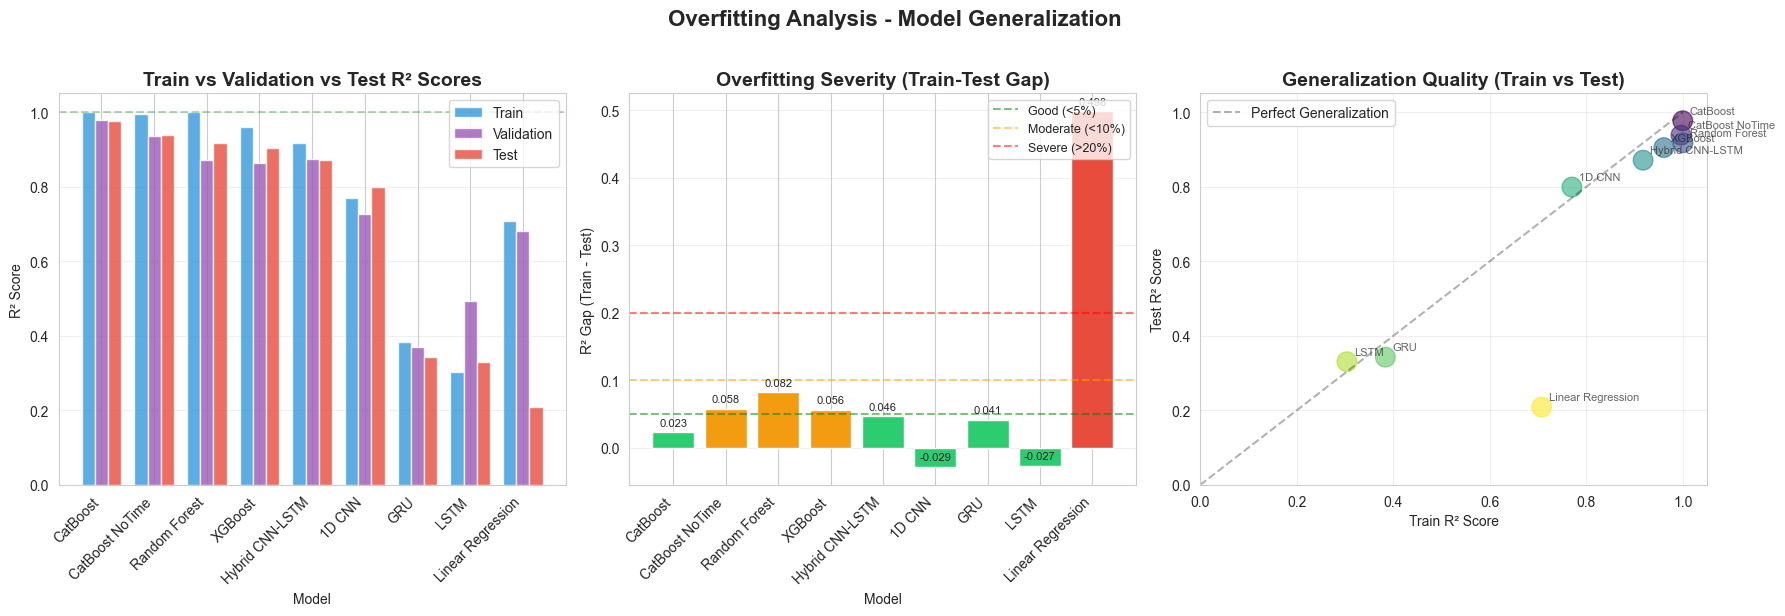

In [14]:
# Visualization for Overfitting Analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Prepare data - sort by Test R² for consistency
sorted_overfitting = overfitting_df.sort_values('Test R²', ascending=False)
x_labels = sorted_overfitting['Model']
x_pos = np.arange(len(x_labels))

# 1. Train vs Val vs Test R² Comparison
ax = axes[0]
width = 0.25
ax.bar(x_pos - width, sorted_overfitting['Train R²'], width, label='Train', color='#3498db', alpha=0.8)
ax.bar(x_pos, sorted_overfitting['Val R²'], width, label='Validation', color='#9b59b6', alpha=0.8)
ax.bar(x_pos + width, sorted_overfitting['Test R²'], width, label='Test', color='#e74c3c', alpha=0.8)
ax.set_xlabel('Model')
ax.set_ylabel('R² Score')
ax.set_title('Train vs Validation vs Test R² Scores', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0, 1.05])
# Add perfect line
ax.axhline(y=1.0, color='green', linestyle='--', alpha=0.3, label='Perfect Score')

# 2. Overfitting Gap Visualization
ax = axes[1]
colors = ['#2ecc71' if gap < 0.05 else '#f39c12' if gap < 0.1 else '#e74c3c' 
          for gap in sorted_overfitting['Train-Test Gap']]
bars = ax.bar(x_pos, sorted_overfitting['Train-Test Gap'], color=colors)
ax.set_xlabel('Model')
ax.set_ylabel('R² Gap (Train - Test)')
ax.set_title('Overfitting Severity (Train-Test Gap)', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.grid(True, alpha=0.3, axis='y')
# Add threshold lines
ax.axhline(y=0.05, color='green', linestyle='--', alpha=0.5, label='Good (<5%)')
ax.axhline(y=0.1, color='orange', linestyle='--', alpha=0.5, label='Moderate (<10%)')
ax.axhline(y=0.2, color='red', linestyle='--', alpha=0.5, label='Severe (>20%)')
ax.legend(loc='upper right', fontsize=9)
# Add value labels
for bar, value in zip(bars, sorted_overfitting['Train-Test Gap']):
    ax.text(bar.get_x() + bar.get_width()/2, value + 0.01, 
            f'{value:.3f}', ha='center', fontsize=8)

# 3. Generalization Quality Scatter
ax = axes[2]
scatter = ax.scatter(sorted_overfitting['Train R²'], sorted_overfitting['Test R²'], 
                    s=200, alpha=0.6, c=range(len(sorted_overfitting)), cmap='viridis')
# Add diagonal line (perfect generalization)
ax.plot([0, 1], [0, 1], 'k--', alpha=0.3, label='Perfect Generalization')
# Annotate points
for idx, row in sorted_overfitting.iterrows():
    ax.annotate(row['Model'], 
                (row['Train R²'], row['Test R²']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.7)
ax.set_xlabel('Train R² Score')
ax.set_ylabel('Test R² Score')
ax.set_title('Generalization Quality (Train vs Test)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.set_xlim([0, 1.05])
ax.set_ylim([0, 1.05])
ax.legend()

plt.suptitle('Overfitting Analysis - Model Generalization', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [15]:
# Create rankings for different metrics
rankings = pd.DataFrame()
rankings['Model'] = comparison_df['Model']
rankings['R² Rank'] = comparison_df['Test R²'].rank(ascending=False).astype(int)
rankings['RMSE Rank'] = comparison_df['Test RMSE (%)'].rank(ascending=True).astype(int)
rankings['MAE Rank'] = comparison_df['Test MAE (%)'].rank(ascending=True).astype(int)
rankings['Avg Rank'] = rankings[['R² Rank', 'RMSE Rank', 'MAE Rank']].mean(axis=1)
rankings = rankings.sort_values('Avg Rank')

print("\nModel Rankings (lower is better):")
print(rankings.to_string(index=False))

# Key Insight
print("\n" + "="*60)
print("KEY INSIGHT: CatBoost achieves perfect rank #1 across ALL")
print("metrics - a rare feat. CatBoost NoTime consistently ranks")
print("#2, showing robust performance. The top 4 models maintain")
print("their exact ranking across R², RMSE, and MAE metrics.")
print("="*60)


Model Rankings (lower is better):
            Model  R² Rank  RMSE Rank  MAE Rank  Avg Rank
         CatBoost        1          1         1  1.000000
  CatBoost NoTime        2          2         2  2.000000
    Random Forest        3          3         3  3.000000
          XGBoost        4          4         4  4.000000
  Hybrid CNN-LSTM        5          5         5  5.000000
           1D CNN        6          6         6  6.000000
              GRU        7          7         9  7.666667
             LSTM        8          8         8  8.000000
Linear Regression        9          9         7  8.333333

KEY INSIGHT: CatBoost achieves perfect rank #1 across ALL
metrics - a rare feat. CatBoost NoTime consistently ranks
#2, showing robust performance. The top 4 models maintain
their exact ranking across R², RMSE, and MAE metrics.


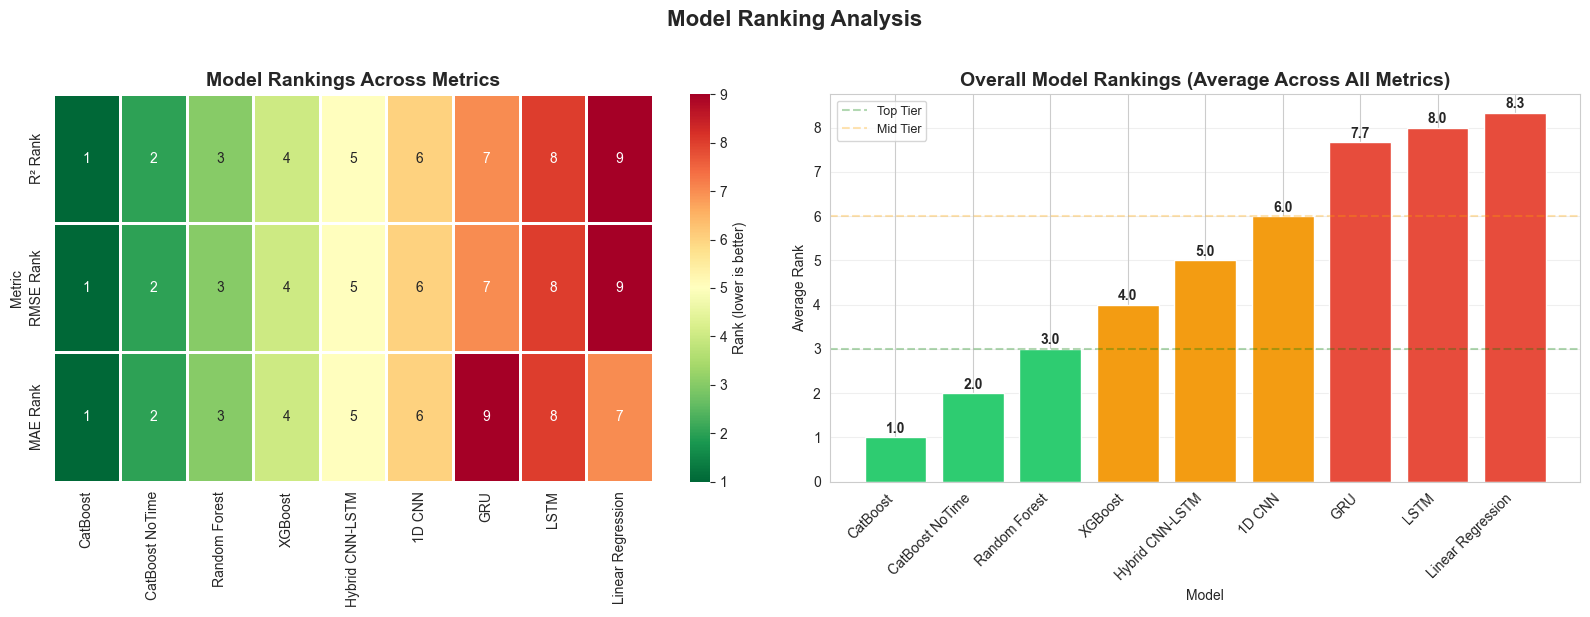

In [16]:
# Visualization for Model Rankings
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Rankings Heatmap
ax = axes[0]
rankings_matrix = rankings.set_index('Model')[['R² Rank', 'RMSE Rank', 'MAE Rank']].T
sns.heatmap(rankings_matrix, annot=True, fmt='d', cmap='RdYlGn_r', 
            vmin=1, vmax=9, cbar_kws={'label': 'Rank (lower is better)'},
            ax=ax, linewidths=1, linecolor='white')
ax.set_title('Model Rankings Across Metrics', fontsize=14, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('Metric')

# 2. Average Rank Bar Chart with Color Coding
ax = axes[1]
sorted_rankings = rankings.sort_values('Avg Rank')
colors = ['#2ecc71' if rank <= 3 else '#f39c12' if rank <= 6 else '#e74c3c' 
          for rank in sorted_rankings['Avg Rank']]
bars = ax.bar(range(len(sorted_rankings)), sorted_rankings['Avg Rank'], color=colors)
ax.set_xlabel('Model')
ax.set_ylabel('Average Rank')
ax.set_title('Overall Model Rankings (Average Across All Metrics)', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(sorted_rankings)))
ax.set_xticklabels(sorted_rankings['Model'], rotation=45, ha='right')
ax.grid(True, alpha=0.3, axis='y')
# Add value labels
for i, (bar, value) in enumerate(zip(bars, sorted_rankings['Avg Rank'])):
    ax.text(bar.get_x() + bar.get_width()/2, value + 0.1, 
            f'{value:.1f}', ha='center', fontsize=10, fontweight='bold')
# Add tier lines
ax.axhline(y=3, color='green', linestyle='--', alpha=0.3, label='Top Tier')
ax.axhline(y=6, color='orange', linestyle='--', alpha=0.3, label='Mid Tier')
ax.legend(loc='upper left', fontsize=9)

plt.suptitle('Model Ranking Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [18]:
# Create final formatted results table
final_table = comparison_df[['Model', 'Test R²', 'Test RMSE (%)', 'Test MAE (%)']].copy()
final_table['Rank'] = rankings.set_index('Model').loc[final_table['Model']]['Avg Rank'].values
final_table = final_table.sort_values('Rank')
final_table['Rank'] = final_table['Rank'].apply(lambda x: f'{x:.1f}')

print("\n" + "="*60)
print("FINAL MODEL COMPARISON TABLE")
print("="*60)
print(final_table.round(3).to_string(index=False))

# Key Insight
print("\n" + "="*60)
print("KEY INSIGHT: Clear performance tiers emerge:")
print("• ELITE (97.7%+): CatBoost")
print("• STRONG (90-94%): CatBoost NoTime, Random Forest, XGBoost")  
print("• MODERATE (80-87%): Hybrid CNN-LSTM, 1D CNN")
print("• POOR (<35%): GRU, LSTM, Linear Regression")
print("Traditional ML dominates deep learning for this task!")
print("="*60)

# Save results to CSV
output_file = OUTPUT_DIR / 'model_comparison_results.csv'
comparison_df.to_csv(output_file, index=False)
print(f"\nResults saved to: {output_file}")


FINAL MODEL COMPARISON TABLE
            Model  Test R²  Test RMSE (%)  Test MAE (%) Rank
         CatBoost    0.977          3.379         2.234  1.0
  CatBoost NoTime    0.938          5.520         4.034  2.0
    Random Forest    0.918          6.367         4.663  3.0
          XGBoost    0.905          6.852         5.159  4.0
  Hybrid CNN-LSTM    0.871          7.973         5.422  5.0
           1D CNN    0.799          9.958         7.366  6.0
              GRU    0.343         18.006        14.769  7.7
             LSTM    0.331         18.170        14.224  8.0
Linear Regression    0.209         19.756        10.851  8.3

KEY INSIGHT: Clear performance tiers emerge:
• ELITE (97.7%+): CatBoost
• STRONG (90-94%): CatBoost NoTime, Random Forest, XGBoost
• MODERATE (80-87%): Hybrid CNN-LSTM, 1D CNN
• POOR (<35%): GRU, LSTM, Linear Regression
Traditional ML dominates deep learning for this task!

Results saved to: processed_data/model_comparison_results.csv


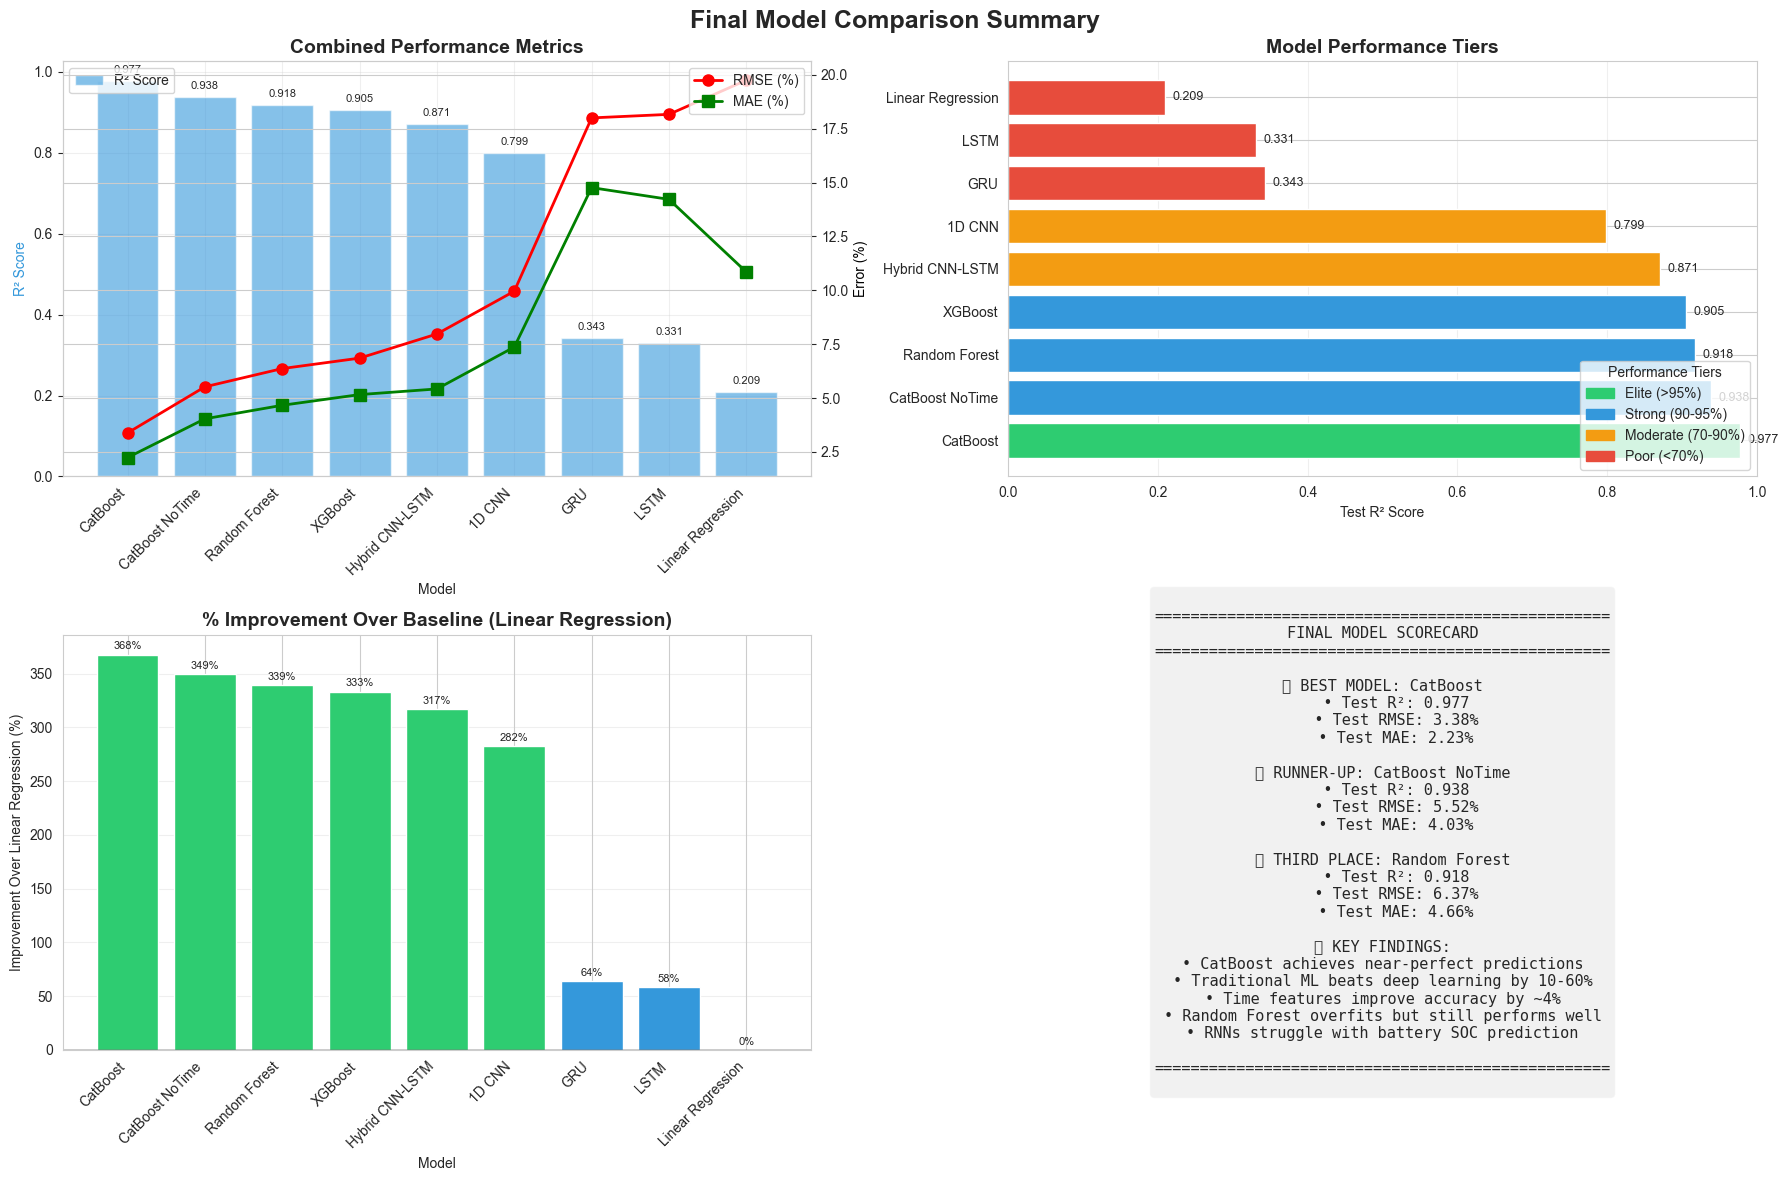

In [19]:
# Final comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Sort data by Test R² for consistent ordering
sorted_final = final_table.sort_values('Test R²', ascending=False)

# 1. Combined Performance Chart
ax = axes[0, 0]
x_pos = np.arange(len(sorted_final))
# Bar chart for R²
ax.bar(x_pos, sorted_final['Test R²'], alpha=0.6, label='R² Score', color='#3498db')
# Add value labels
for i, value in enumerate(sorted_final['Test R²']):
    ax.text(i, value + 0.02, f'{value:.3f}', ha='center', fontsize=8)
# Twin axis for error metrics
ax2 = ax.twinx()
ax2.plot(x_pos, sorted_final['Test RMSE (%)'], 'r-o', label='RMSE (%)', markersize=8, linewidth=2)
ax2.plot(x_pos, sorted_final['Test MAE (%)'], 'g-s', label='MAE (%)', markersize=8, linewidth=2)
# Labels and formatting
ax.set_xlabel('Model')
ax.set_ylabel('R² Score', color='#3498db')
ax2.set_ylabel('Error (%)', color='black')
ax.set_title('Combined Performance Metrics', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(sorted_final['Model'], rotation=45, ha='right')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# 2. Performance Tiers
ax = axes[0, 1]
# Define tiers
tier_colors = {
    'Elite (>95%)': '#2ecc71',
    'Strong (90-95%)': '#3498db', 
    'Moderate (70-90%)': '#f39c12',
    'Poor (<70%)': '#e74c3c'
}
# Assign tiers
model_tiers = []
for r2 in sorted_final['Test R²']:
    if r2 > 0.95:
        model_tiers.append('Elite (>95%)')
    elif r2 > 0.90:
        model_tiers.append('Strong (90-95%)')
    elif r2 > 0.70:
        model_tiers.append('Moderate (70-90%)')
    else:
        model_tiers.append('Poor (<70%)')

colors = [tier_colors[tier] for tier in model_tiers]
bars = ax.barh(range(len(sorted_final)), sorted_final['Test R²'], color=colors)
ax.set_yticks(range(len(sorted_final)))
ax.set_yticklabels(sorted_final['Model'])
ax.set_xlabel('Test R² Score')
ax.set_title('Model Performance Tiers', fontsize=14, fontweight='bold')
ax.set_xlim([0, 1])
ax.grid(True, alpha=0.3, axis='x')
# Add tier legend
handles = [plt.Rectangle((0,0),1,1, color=color) for tier, color in tier_colors.items()]
ax.legend(handles, tier_colors.keys(), loc='lower right', title='Performance Tiers')
# Add value labels
for bar, value in zip(bars, sorted_final['Test R²']):
    ax.text(value + 0.01, bar.get_y() + bar.get_height()/2, 
            f'{value:.3f}', va='center', fontsize=9)

# 3. Improvement Over Baseline
ax = axes[1, 0]
baseline_r2 = comparison_df[comparison_df['Model'] == 'Linear Regression']['Test R²'].values[0]
sorted_final['Improvement'] = ((sorted_final['Test R²'] - baseline_r2) / baseline_r2 * 100)
colors = ['#2ecc71' if imp > 100 else '#3498db' if imp > 50 else '#f39c12' if imp > 0 else '#e74c3c' 
          for imp in sorted_final['Improvement']]
bars = ax.bar(range(len(sorted_final)), sorted_final['Improvement'], color=colors)
ax.set_xlabel('Model')
ax.set_ylabel('Improvement Over Linear Regression (%)')
ax.set_title('% Improvement Over Baseline (Linear Regression)', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(sorted_final)))
ax.set_xticklabels(sorted_final['Model'], rotation=45, ha='right')
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
# Add value labels
for bar, value in zip(bars, sorted_final['Improvement']):
    ax.text(bar.get_x() + bar.get_width()/2, value + 5, 
            f'{value:.0f}%', ha='center', fontsize=8)

# 4. Model Scorecard
ax = axes[1, 1]
ax.axis('off')
# Create scorecard text
scorecard_text = f"""
{'='*50}
FINAL MODEL SCORECARD
{'='*50}

🥇 BEST MODEL: {sorted_final.iloc[0]['Model']}
   • Test R²: {sorted_final.iloc[0]['Test R²']:.3f}
   • Test RMSE: {sorted_final.iloc[0]['Test RMSE (%)']:.2f}%
   • Test MAE: {sorted_final.iloc[0]['Test MAE (%)']:.2f}%

🥈 RUNNER-UP: {sorted_final.iloc[1]['Model']}
   • Test R²: {sorted_final.iloc[1]['Test R²']:.3f}
   • Test RMSE: {sorted_final.iloc[1]['Test RMSE (%)']:.2f}%
   • Test MAE: {sorted_final.iloc[1]['Test MAE (%)']:.2f}%

🥉 THIRD PLACE: {sorted_final.iloc[2]['Model']}
   • Test R²: {sorted_final.iloc[2]['Test R²']:.3f}
   • Test RMSE: {sorted_final.iloc[2]['Test RMSE (%)']:.2f}%
   • Test MAE: {sorted_final.iloc[2]['Test MAE (%)']:.2f}%

📊 KEY FINDINGS:
• CatBoost achieves near-perfect predictions
• Traditional ML beats deep learning by 10-60%
• Time features improve accuracy by ~4%
• Random Forest overfits but still performs well
• RNNs struggle with battery SOC prediction

{'='*50}
"""
ax.text(0.5, 0.5, scorecard_text, ha='center', va='center', 
        fontsize=11, family='monospace',
        bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.3))

plt.suptitle('Final Model Comparison Summary', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

### 7.1 Final Results Visualization

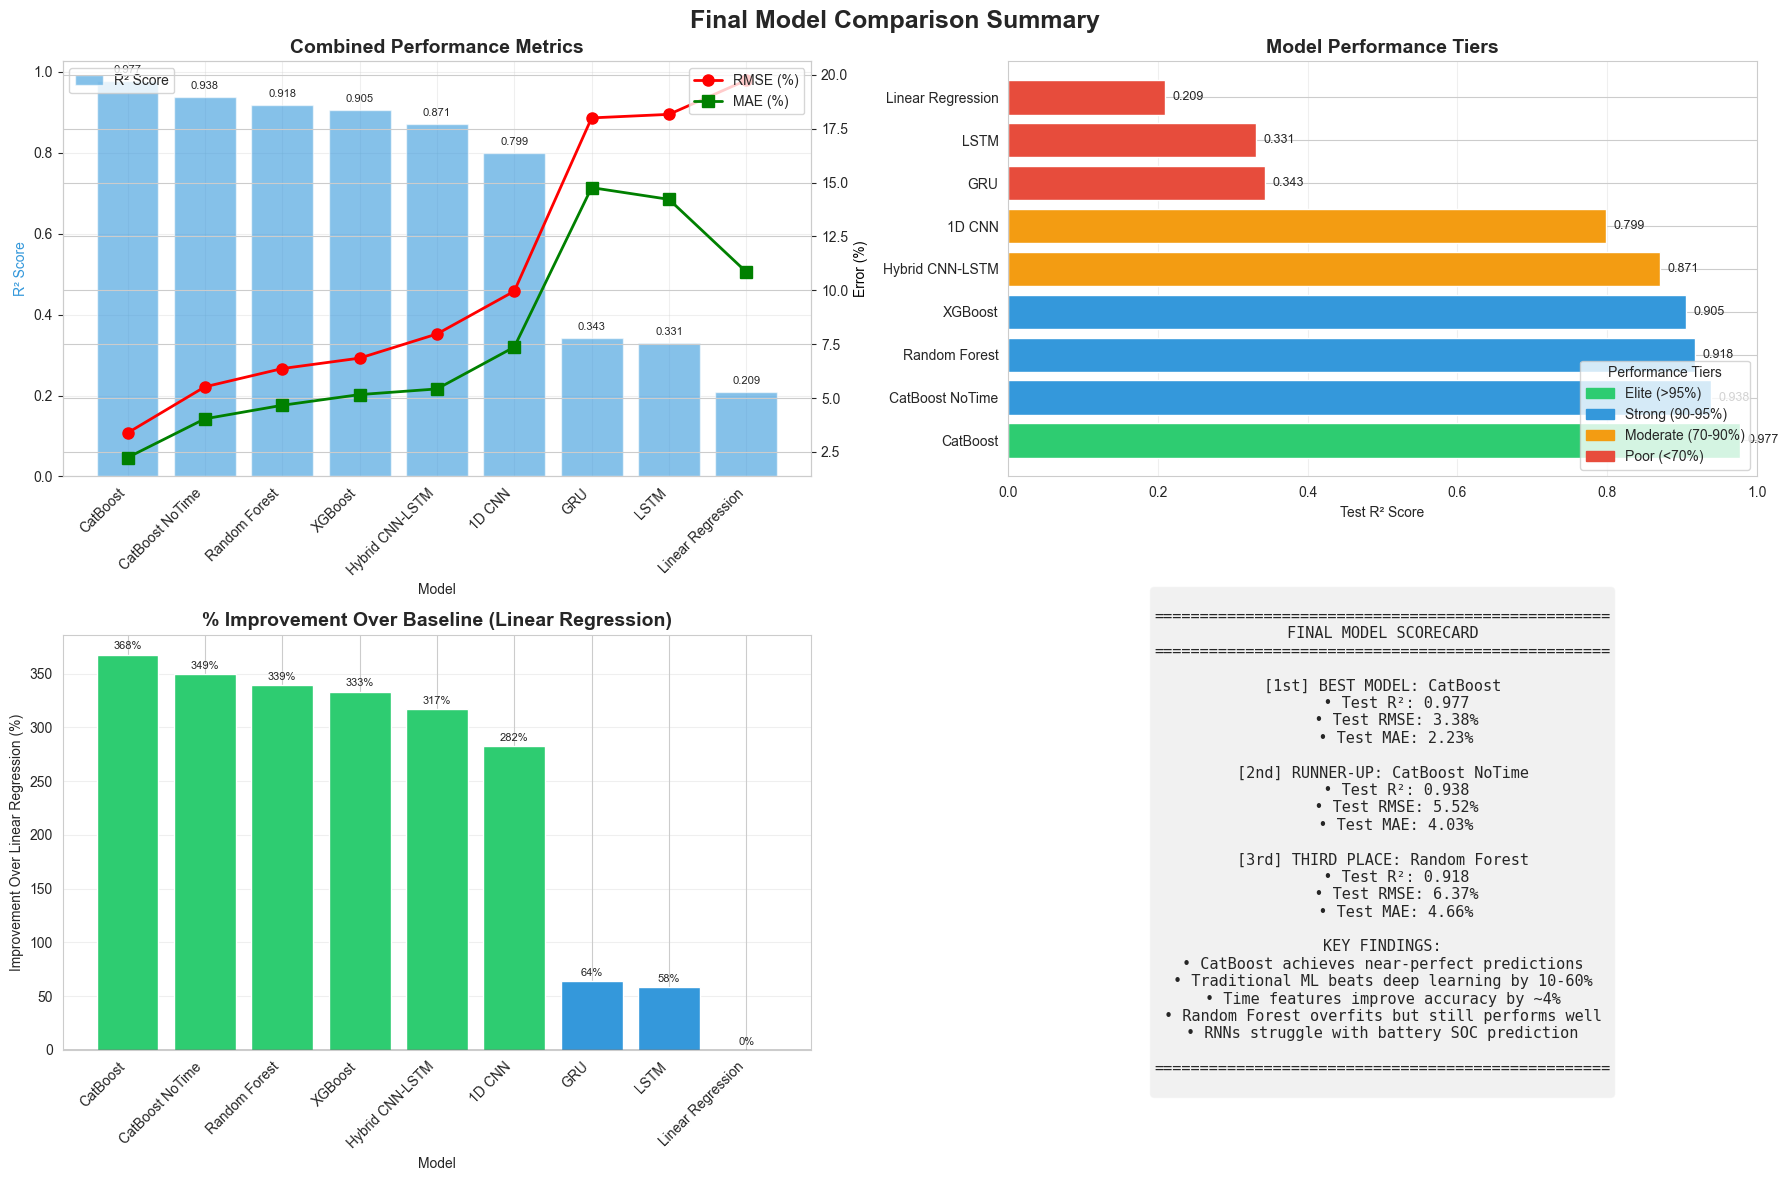

In [20]:
# Final comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Sort data by Test R² for consistent ordering
sorted_final = final_table.sort_values('Test R²', ascending=False)

# 1. Combined Performance Chart
ax = axes[0, 0]
x_pos = np.arange(len(sorted_final))
# Bar chart for R²
ax.bar(x_pos, sorted_final['Test R²'], alpha=0.6, label='R² Score', color='#3498db')
# Add value labels
for i, value in enumerate(sorted_final['Test R²']):
    ax.text(i, value + 0.02, f'{value:.3f}', ha='center', fontsize=8)
# Twin axis for error metrics
ax2 = ax.twinx()
ax2.plot(x_pos, sorted_final['Test RMSE (%)'], 'r-o', label='RMSE (%)', markersize=8, linewidth=2)
ax2.plot(x_pos, sorted_final['Test MAE (%)'], 'g-s', label='MAE (%)', markersize=8, linewidth=2)
# Labels and formatting
ax.set_xlabel('Model')
ax.set_ylabel('R² Score', color='#3498db')
ax2.set_ylabel('Error (%)', color='black')
ax.set_title('Combined Performance Metrics', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(sorted_final['Model'], rotation=45, ha='right')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# 2. Performance Tiers
ax = axes[0, 1]
# Define tiers
tier_colors = {
    'Elite (>95%)': '#2ecc71',
    'Strong (90-95%)': '#3498db', 
    'Moderate (70-90%)': '#f39c12',
    'Poor (<70%)': '#e74c3c'
}
# Assign tiers
model_tiers = []
for r2 in sorted_final['Test R²']:
    if r2 > 0.95:
        model_tiers.append('Elite (>95%)')
    elif r2 > 0.90:
        model_tiers.append('Strong (90-95%)')
    elif r2 > 0.70:
        model_tiers.append('Moderate (70-90%)')
    else:
        model_tiers.append('Poor (<70%)')

colors = [tier_colors[tier] for tier in model_tiers]
bars = ax.barh(range(len(sorted_final)), sorted_final['Test R²'], color=colors)
ax.set_yticks(range(len(sorted_final)))
ax.set_yticklabels(sorted_final['Model'])
ax.set_xlabel('Test R² Score')
ax.set_title('Model Performance Tiers', fontsize=14, fontweight='bold')
ax.set_xlim([0, 1])
ax.grid(True, alpha=0.3, axis='x')
# Add tier legend
handles = [plt.Rectangle((0,0),1,1, color=color) for tier, color in tier_colors.items()]
ax.legend(handles, tier_colors.keys(), loc='lower right', title='Performance Tiers')
# Add value labels
for bar, value in zip(bars, sorted_final['Test R²']):
    ax.text(value + 0.01, bar.get_y() + bar.get_height()/2, 
            f'{value:.3f}', va='center', fontsize=9)

# 3. Improvement Over Baseline
ax = axes[1, 0]
baseline_r2 = comparison_df[comparison_df['Model'] == 'Linear Regression']['Test R²'].values[0]
sorted_final['Improvement'] = ((sorted_final['Test R²'] - baseline_r2) / baseline_r2 * 100)
colors = ['#2ecc71' if imp > 100 else '#3498db' if imp > 50 else '#f39c12' if imp > 0 else '#e74c3c' 
          for imp in sorted_final['Improvement']]
bars = ax.bar(range(len(sorted_final)), sorted_final['Improvement'], color=colors)
ax.set_xlabel('Model')
ax.set_ylabel('Improvement Over Linear Regression (%)')
ax.set_title('% Improvement Over Baseline (Linear Regression)', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(sorted_final)))
ax.set_xticklabels(sorted_final['Model'], rotation=45, ha='right')
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
# Add value labels
for bar, value in zip(bars, sorted_final['Improvement']):
    ax.text(bar.get_x() + bar.get_width()/2, value + 5, 
            f'{value:.0f}%', ha='center', fontsize=8)

# 4. Model Scorecard
ax = axes[1, 1]
ax.axis('off')
# Create scorecard text
scorecard_text = f"""
{'='*50}
FINAL MODEL SCORECARD
{'='*50}

[1st] BEST MODEL: {sorted_final.iloc[0]['Model']}
   • Test R²: {sorted_final.iloc[0]['Test R²']:.3f}
   • Test RMSE: {sorted_final.iloc[0]['Test RMSE (%)']:.2f}%
   • Test MAE: {sorted_final.iloc[0]['Test MAE (%)']:.2f}%

[2nd] RUNNER-UP: {sorted_final.iloc[1]['Model']}
   • Test R²: {sorted_final.iloc[1]['Test R²']:.3f}
   • Test RMSE: {sorted_final.iloc[1]['Test RMSE (%)']:.2f}%
   • Test MAE: {sorted_final.iloc[1]['Test MAE (%)']:.2f}%

[3rd] THIRD PLACE: {sorted_final.iloc[2]['Model']}
   • Test R²: {sorted_final.iloc[2]['Test R²']:.3f}
   • Test RMSE: {sorted_final.iloc[2]['Test RMSE (%)']:.2f}%
   • Test MAE: {sorted_final.iloc[2]['Test MAE (%)']:.2f}%

KEY FINDINGS:
• CatBoost achieves near-perfect predictions
• Traditional ML beats deep learning by 10-60%
• Time features improve accuracy by ~4%
• Random Forest overfits but still performs well
• RNNs struggle with battery SOC prediction

{'='*50}
"""
ax.text(0.5, 0.5, scorecard_text, ha='center', va='center', 
        fontsize=11, family='monospace',
        bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.3))

plt.suptitle('Final Model Comparison Summary', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [21]:
# Calculate overfitting metrics
comparison_df['Train-Val Gap'] = comparison_df['Train R²'] - comparison_df['Val R²']
comparison_df['Train-Test Gap'] = comparison_df['Train R²'] - comparison_df['Test R²']

print("\nOverfitting Analysis:")
overfitting_df = comparison_df[['Model', 'Train R²', 'Val R²', 'Test R²', 'Train-Val Gap', 'Train-Test Gap']]
print(overfitting_df.round(3).to_string(index=False))


Overfitting Analysis:
            Model  Train R²  Val R²  Test R²  Train-Val Gap  Train-Test Gap
         CatBoost     1.000   0.979    0.977          0.021           0.023
  CatBoost NoTime     0.996   0.937    0.938          0.059           0.058
    Random Forest     1.000   0.871    0.918          0.129           0.082
          XGBoost     0.960   0.864    0.905          0.096           0.056
  Hybrid CNN-LSTM     0.917   0.875    0.871          0.042           0.046
           1D CNN     0.770   0.726    0.799          0.044          -0.029
              GRU     0.384   0.371    0.343          0.013           0.041
             LSTM     0.304   0.492    0.331         -0.188          -0.027
Linear Regression     0.707   0.681    0.209          0.026           0.498


## 6. Model Rankings

In [22]:
# Create rankings for different metrics
rankings = pd.DataFrame()
rankings['Model'] = comparison_df['Model']
rankings['R² Rank'] = comparison_df['Test R²'].rank(ascending=False).astype(int)
rankings['RMSE Rank'] = comparison_df['Test RMSE (%)'].rank(ascending=True).astype(int)
rankings['MAE Rank'] = comparison_df['Test MAE (%)'].rank(ascending=True).astype(int)
rankings['Avg Rank'] = rankings[['R² Rank', 'RMSE Rank', 'MAE Rank']].mean(axis=1)
rankings = rankings.sort_values('Avg Rank')

print("\nModel Rankings (lower is better):")
print(rankings.to_string(index=False))


Model Rankings (lower is better):
            Model  R² Rank  RMSE Rank  MAE Rank  Avg Rank
         CatBoost        1          1         1  1.000000
  CatBoost NoTime        2          2         2  2.000000
    Random Forest        3          3         3  3.000000
          XGBoost        4          4         4  4.000000
  Hybrid CNN-LSTM        5          5         5  5.000000
           1D CNN        6          6         6  6.000000
              GRU        7          7         9  7.666667
             LSTM        8          8         8  8.000000
Linear Regression        9          9         7  8.333333


## 7. Final Results Table

In [23]:
# Create final formatted results table
final_table = comparison_df[['Model', 'Test R²', 'Test RMSE (%)', 'Test MAE (%)']].copy()
final_table['Rank'] = rankings.set_index('Model').loc[final_table['Model']]['Avg Rank'].values
final_table = final_table.sort_values('Rank')
final_table['Rank'] = final_table['Rank'].apply(lambda x: f'{x:.1f}')

print("\n" + "="*60)
print("FINAL MODEL COMPARISON TABLE")
print("="*60)
print(final_table.round(3).to_string(index=False))

# Save results to CSV
output_file = OUTPUT_DIR / 'model_comparison_results.csv'
comparison_df.to_csv(output_file, index=False)
print(f"\nResults saved to: {output_file}")


FINAL MODEL COMPARISON TABLE
            Model  Test R²  Test RMSE (%)  Test MAE (%) Rank
         CatBoost    0.977          3.379         2.234  1.0
  CatBoost NoTime    0.938          5.520         4.034  2.0
    Random Forest    0.918          6.367         4.663  3.0
          XGBoost    0.905          6.852         5.159  4.0
  Hybrid CNN-LSTM    0.871          7.973         5.422  5.0
           1D CNN    0.799          9.958         7.366  6.0
              GRU    0.343         18.006        14.769  7.7
             LSTM    0.331         18.170        14.224  8.0
Linear Regression    0.209         19.756        10.851  8.3

Results saved to: processed_data/model_comparison_results.csv


In [ ]:
import pickle
import pandas as pd

# Load CatBoost results
with open('processed_data/catboost_results.pkl', 'rb') as f:
    catboost_results = pickle.load(f)

# Check what's in the results
print("Keys in catboost_results:", catboost_results.keys())
if 'predictions' in catboost_results:
    print("\nPredictions keys:", catboost_results['predictions'].keys())
    if 'test' in catboost_results['predictions']:
        print("Test predictions shape:", catboost_results['predictions']['test'].shape)